#📌 Extracción

In [49]:
import pandas as pd
import numpy as np

In [50]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

In [51]:
df = pd.read_json(url)
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformación

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [53]:
df.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


In [54]:
# 1. Definir las columnas anidadas que contienen diccionarios
nested_cols = ['customer', 'phone', 'internet', 'account']

# 2. Inicializar una lista para las partes aplanadas (Customer ID y Churn)
df_list = [df[['customerID', 'Churn']]]

# 3. Iterar sobre las columnas anidadas y aplanarlas
for col in nested_cols:
    df_temp = pd.json_normalize(df[col])
    # Renombrar las columnas (ej: phone_PhoneService)
    df_temp.columns = [f'{col}_{sub_col}' for sub_col in df_temp.columns]
    df_list.append(df_temp)

# 4. Concatenar todas las partes aplanadas
df = pd.concat(df_list, axis=1)

print("✅ Datos Aplanados. Ahora podemos verificar los valores internos.")

✅ Datos Aplanados. Ahora podemos verificar los valores internos.


In [55]:
# Mostrar valores únicos en la columna de gasto total para confirmar el problema
# print(df['account_Charges.Total'].unique())

# El error indica que la columna 'account_TotalCharges' no existe.
# Vamos a imprimir todas las columnas para que puedas identificar el nombre correcto.
print("Columnas disponibles en el DataFrame:")
print(df.columns)

# Las siguientes líneas están comentadas porque dependen de la existencia de 'account_TotalCharges'.
# Una vez que identifiques el nombre correcto, descomenta y actualiza estas líneas.
df['account_Charges.Total'] = df['account_Charges.Total'].replace(' ', np.nan)
df['account_Charges.Total'] = pd.to_numeric(df['account_Charges.Total'], errors='coerce')

# Rellenar los valores faltantes (NaN) con 0.0, ya que corresponden a clientes con Antiguedad 0
df['account_Charges.Total'] = df['account_Charges.Total'].fillna(0.0)

print(f"\n✅ account_Charges.Total limpiada. Nuevo tipo: {df['account_Charges.Total'].dtype}")

Columnas disponibles en el DataFrame:
Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges.Monthly', 'account_Charges.Total'],
      dtype='object')

✅ account_Charges.Total limpiada. Nuevo tipo: float64


In [56]:
print("\n--- Conteo de Valores Nulos en todas las columnas ---")
nulos = df.isnull().sum()
nulos_relevantes = nulos[nulos > 0]

if not nulos_relevantes.empty:
    print(nulos_relevantes)
    # Si hay otros nulos, se deben decidir si eliminar las filas o imputar.
else:
    print("¡No hay otros valores nulos que deban ser tratados!")


--- Conteo de Valores Nulos en todas las columnas ---
¡No hay otros valores nulos que deban ser tratados!


In [57]:
# Filas totalmente duplicadas
print(f"\nNúmero de filas totalmente duplicadas: {df.duplicated().sum()}")

# Duplicados basados en la clave primaria (customerID)
print(f"Número de IDs de cliente duplicados: {df['customerID'].duplicated().sum()}")


Número de filas totalmente duplicadas: 0
Número de IDs de cliente duplicados: 0


In [58]:
# Ejemplo de verificación
print("\n--- Verificación de Inconsistencias Categóricas ---")

print(f"customer_gender: {df['customer_gender'].unique()}")
print(f"Churn: {df['Churn'].unique()}")
print(f"account_Contract: {df['account_Contract'].unique()}")


--- Verificación de Inconsistencias Categóricas ---
customer_gender: ['Female' 'Male']
Churn: ['No' 'Yes' '']
account_Contract: ['One year' 'Month-to-month' 'Two year']


In [59]:
# Definir una lista de columnas binarias que queremos convertir a 0 y 1
columnas_binarias = [
    'Churn', 'customer_Partner', 'customer_Dependents', 'phone_PhoneService',
    'phone_MultipleLines', 'internet_OnlineSecurity', 'internet_OnlineBackup',
    'internet_DeviceProtection', 'internet_TechSupport', 'internet_StreamingTV',
    'internet_StreamingMovies', 'account_PaperlessBilling'
]

# Aplicar la codificación 'Yes' -> 1, y 'No'/'No phone service'/'No internet service' -> 0
for col in columnas_binarias:
    if col in df.columns:
        # Replace common 'No service' strings with 0, alongside 'Yes' and 'No'
        df[col] = df[col].replace({'Yes': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0})

        # Ensure the column is numeric, coercing any remaining non-numeric to NaN
        # This handles cases where other unexpected string values might exist
        df[col] = pd.to_numeric(df[col], errors='coerce')

        # Fill any NaNs created by coercion with 0, assuming absence of service means 0
        df[col] = df[col].fillna(0)

# La columna 'customer_SeniorCitizen' ya está en 0 y 1.

print("✅ Columnas binarias codificadas de 'Yes'/'No'/'No service' a 1/0 y convertidas a numérico.")

✅ Columnas binarias codificadas de 'Yes'/'No'/'No service' a 1/0 y convertidas a numérico.


/tmp/ipython-input-72503549.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({'Yes': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0})


In [60]:
# La columna de cargo mensual (CostoMensual) después del aplanamiento se llama 'account_Charges.Monthly'
# La dividimos entre 30 (días promedio en un mes) para obtener el cargo diario.
df['Cuentas_Diarias'] = df['account_Charges.Monthly'] / 30

print("✅ Columna 'Cuentas_Diarias' creada exitosamente.")

# Opcional: Mostrar las primeras filas para verificar el resultado
print("\nVerificación de las nuevas columnas:")
print(df[['account_Charges.Monthly', 'Cuentas_Diarias']].head())

✅ Columna 'Cuentas_Diarias' creada exitosamente.

Verificación de las nuevas columnas:
   account_Charges.Monthly  Cuentas_Diarias
0                     65.6         2.186667
1                     59.9         1.996667
2                     73.9         2.463333
3                     98.0         3.266667
4                     83.9         2.796667


In [61]:
renombre_mapa = {
    # Cliente
    'customerID': 'ID_Cliente',
    'customer_gender': 'Genero',
    'customer_SeniorCitizen': 'Tercera_Edad', # Ya codificado a 1/0
    'customer_Partner': 'Pareja',             # Ya codificado a 1/0
    'customer_Dependents': 'Dependientes',    # Ya codificado a 1/0
    'customer_tenure': 'Antiguedad_Meses',

    # Servicios de Teléfono
    'phone_PhoneService': 'Servicio_Telefonico',  # Ya codificado a 1/0
    'phone_MultipleLines': 'Multiples_Lineas',    # Ya codificado a 1/0

    # Servicios de Internet (Tipo y Add-ons)
    'internet_InternetService': 'Servicio_Internet_Tipo',
    'internet_OnlineSecurity': 'Seguridad_Online',        # Ya codificado a 1/0
    'internet_OnlineBackup': 'Copia_Seguridad_Online',    # Ya codificado a 1/0
    'internet_DeviceProtection': 'Proteccion_Dispositivo', # Ya codificado a 1/0
    'internet_TechSupport': 'Soporte_Tecnico',             # Ya codificado a 1/0
    'internet_StreamingTV': 'Streaming_TV',               # Ya codificado a 1/0
    'internet_StreamingMovies': 'Streaming_Peliculas',     # Ya codificado a 1/0

    # Cuenta y Facturación
    'account_Contract': 'Tipo_Contrato',
    'account_PaperlessBilling': 'Facturacion_Electronica', # Ya codificado a 1/0
    'account_PaymentMethod': 'Metodo_Pago',
    'account_MonthlyCharges': 'Costo_Mensual',
    'account_TotalCharges': 'Total_Gastado',

    # Columna calculada
    'Cuentas_Diarias': 'Costo_Diario',

    # Variable Objetivo
    'Churn': 'Evasion' # Ya codificado a 1/0
}

In [62]:
df.rename(columns=renombre_mapa, inplace=True)

# 3. Verificación Rápida
print("✅ Renombre y Estandarización de columnas completado.")
print("\nNuevas columnas (primeras 5):")
print(df.columns[:5].tolist())

# También podemos verificar las últimas columnas, incluyendo las de gasto:
print(df.columns[-5:].tolist())

✅ Renombre y Estandarización de columnas completado.

Nuevas columnas (primeras 5):
['ID_Cliente', 'Evasion', 'Genero', 'Tercera_Edad', 'Pareja']
['Facturacion_Electronica', 'Metodo_Pago', 'account_Charges.Monthly', 'account_Charges.Total', 'Costo_Diario']


In [63]:
df.head()

,ID_Cliente,Evasion,Genero,Tercera_Edad,Pareja,Dependientes,Antiguedad_Meses,Servicio_Telefonico,Multiples_Lineas,Servicio_Internet_Tipo,...,Proteccion_Dispositivo,Soporte_Tecnico,Streaming_TV,Streaming_Peliculas,Tipo_Contrato,Facturacion_Electronica,Metodo_Pago,account_Charges.Monthly,account_Charges.Total,Costo_Diario
0,0002-ORFBO,0.0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0.0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1.0,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


#📊 Carga y análisis

In [64]:
# Usamos .describe() con el parámetro include='all' para ver también las categóricas,
# pero el enfoque principal es el resumen estadístico de las numéricas.
analisis_descriptivo = df.describe()
print(analisis_descriptivo)

           Evasion  Tercera_Edad       Pareja  Dependientes  Antiguedad_Meses  \
count  7267.000000   7267.000000  7267.000000   7267.000000       7267.000000   
mean      0.257190      0.162653     0.484106      0.300124         32.346498   
std       0.437115      0.369074     0.499782      0.458343         24.571773   
min       0.000000      0.000000     0.000000      0.000000          0.000000   
25%       0.000000      0.000000     0.000000      0.000000          9.000000   
50%       0.000000      0.000000     0.000000      0.000000         29.000000   
75%       1.000000      0.000000     1.000000      1.000000         55.000000   
max       1.000000      1.000000     1.000000      1.000000         72.000000   

       Servicio_Telefonico  Multiples_Lineas  Seguridad_Online  \
count          7267.000000       7267.000000       7267.000000   
mean              0.902711          0.421770          0.285950   
std               0.296371          0.493876          0.451897   
min   

In [65]:
# Contar el número de 'No' (0) y 'Yes' (1)
conteo_evasion = df['Evasion'].value_counts()
print(conteo_evasion)

Evasion
0.0    5398
1.0    1869
Name: count, dtype: int64


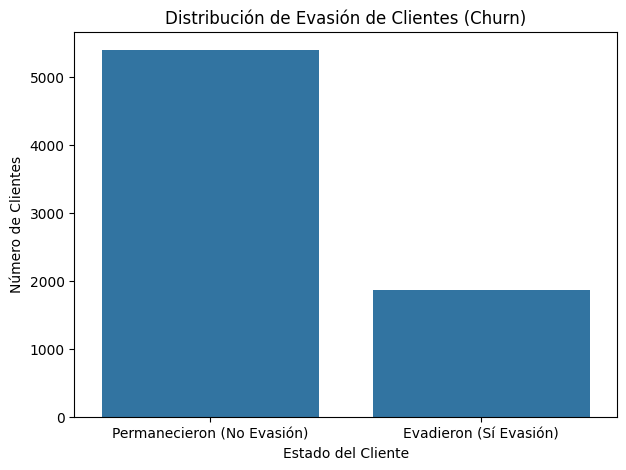

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns # Opcional, pero da mejores gráficos

# Mapear los valores 0 y 1 a etiquetas legibles
etiquetas = {0: 'Permanecieron (No Evasión)', 1: 'Evadieron (Sí Evasión)'}
conteo_evasion.index = conteo_evasion.index.map(etiquetas)

plt.figure(figsize=(7, 5))
sns.barplot(x=conteo_evasion.index, y=conteo_evasion.values)

plt.title('Distribución de Evasión de Clientes (Churn)')
plt.xlabel('Estado del Cliente')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=0) # Asegurar etiquetas horizontales
plt.show()

In [67]:
total_clientes = len(df)
clientes_evadidos = conteo_evasion.get(1, 0) # Obtener el conteo de la etiqueta 1 (Evadieron)
tasa_evasion = (clientes_evadidos / total_clientes) * 100

print(f"\nNúmero Total de Clientes: {total_clientes}")
print(f"Clientes que Evadieron: {clientes_evadidos}")
print(f"La Tasa de Evasión (Churn Rate) es: {tasa_evasion:.2f}%")


Número Total de Clientes: 7267
Clientes que Evadieron: 1869
La Tasa de Evasión (Churn Rate) es: 25.72%


/tmp/ipython-input-3621059427.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  clientes_evadidos = conteo_evasion.get(1, 0) # Obtener el conteo de la etiqueta 1 (Evadieron)


In [68]:
# 1. Crear la tabla cruzada de contingencia
tabla_contrato = pd.crosstab(df['Tipo_Contrato'], df['Evasion'], normalize='index') * 100

print("--- Tasa de Evasión (%) por Tipo de Contrato ---")
print(tabla_contrato.round(2))

--- Tasa de Evasión (%) por Tipo de Contrato ---
Evasion           0.0    1.0
Tipo_Contrato               
Month-to-month  58.68  41.32
One year        89.07  10.93
Two year        97.25   2.75


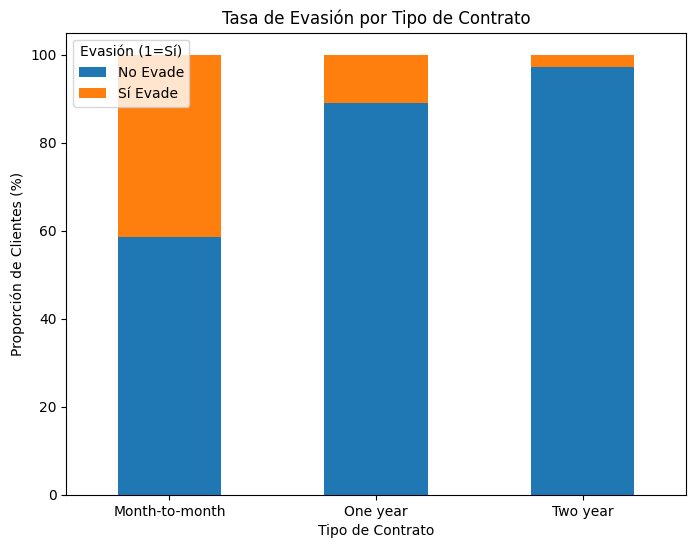

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el gráfico de barras apiladas basado en la tabla_contrato
tabla_contrato.plot(kind='bar', stacked=True, figsize=(8, 6))

plt.title('Tasa de Evasión por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Proporción de Clientes (%)')
plt.legend(title='Evasión (1=Sí)', labels=['No Evade', 'Sí Evade'])
plt.xticks(rotation=0)
plt.show()


--- Tasa de Evasión (%) por Método de Pago ---
Evasion                      0.0    1.0
Metodo_Pago                            
Bank transfer (automatic)  83.76  16.24
Credit card (automatic)    85.20  14.80
Electronic check           56.20  43.80
Mailed check               81.50  18.50


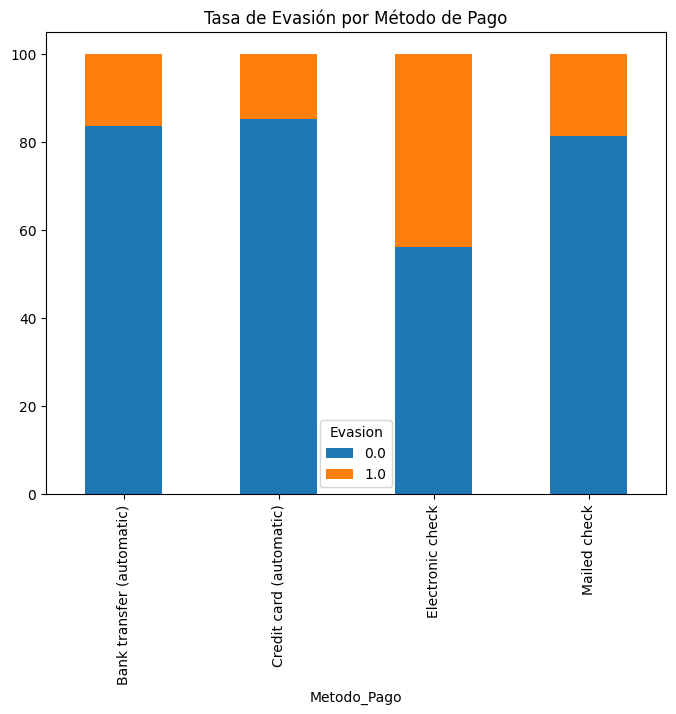

In [70]:
# Analizar la evasión por método de pago
tabla_pago = pd.crosstab(df['Metodo_Pago'], df['Evasion'], normalize='index') * 100

print("\n--- Tasa de Evasión (%) por Método de Pago ---")
print(tabla_pago.round(2))

# Visualizar (opcional)
tabla_pago.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Tasa de Evasión por Método de Pago')
plt.show()


--- Tasa de Evasión (%) por Tipo de Servicio de Internet ---
Evasion                   0.0    1.0
Servicio_Internet_Tipo              
DSL                     81.55  18.45
Fiber optic             59.44  40.56
No                      92.85   7.15


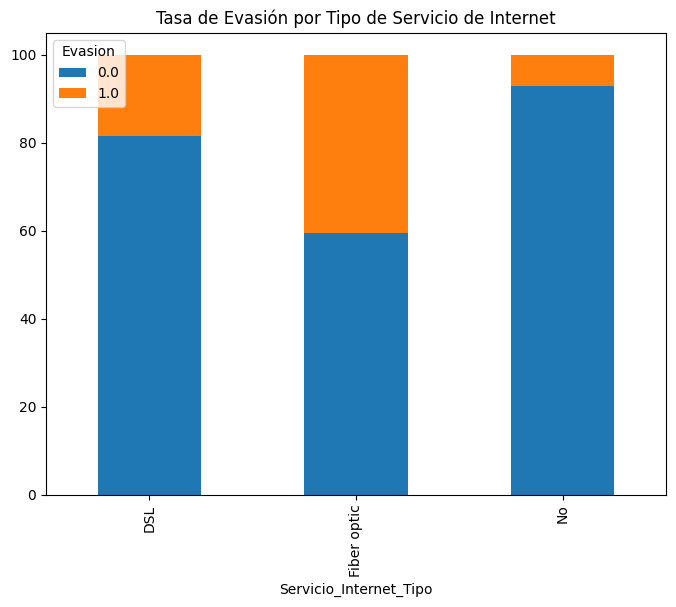

In [71]:
# Analizar la evasión por servicio de internet
tabla_internet = pd.crosstab(df['Servicio_Internet_Tipo'], df['Evasion'], normalize='index') * 100

print("\n--- Tasa de Evasión (%) por Tipo de Servicio de Internet ---")
print(tabla_internet.round(2))

# Visualizar (opcional)
tabla_internet.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Tasa de Evasión por Tipo de Servicio de Internet')
plt.show()

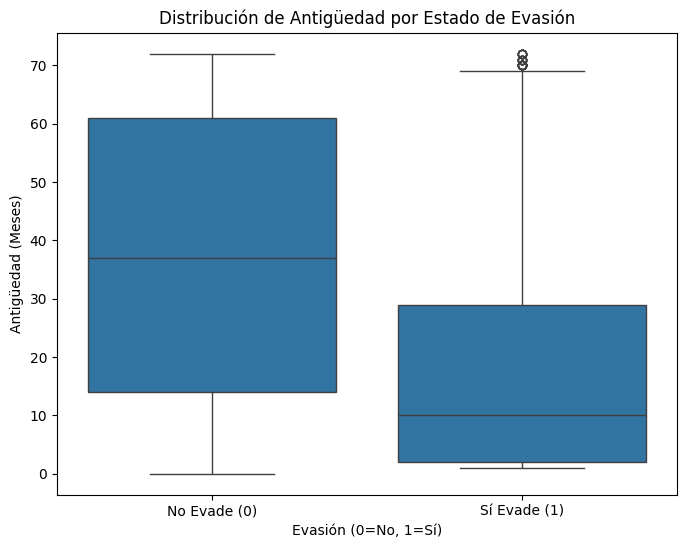

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
# Usamos 'Evasion' en el eje X y la variable numérica en el eje Y
sns.boxplot(x='Evasion', y='Antiguedad_Meses', data=df)

plt.title('Distribución de Antigüedad por Estado de Evasión')
plt.xlabel('Evasión (0=No, 1=Sí)')
plt.ylabel('Antigüedad (Meses)')
plt.xticks([0, 1], ['No Evade (0)', 'Sí Evade (1)'])
plt.show()

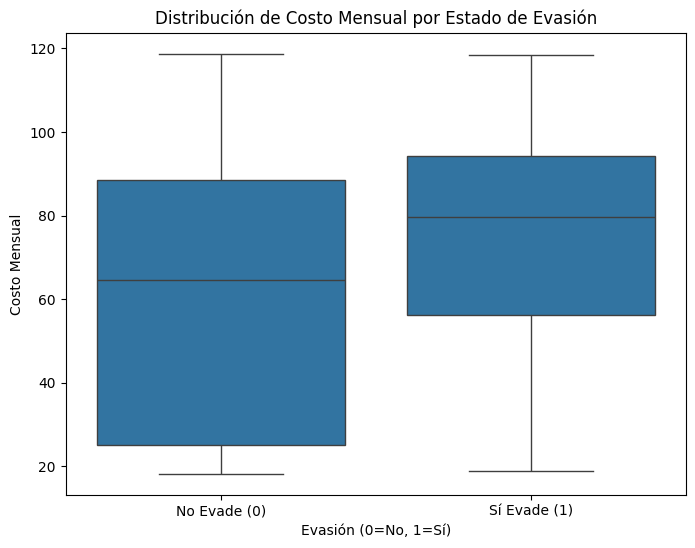

In [73]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Evasion', y='account_Charges.Monthly', data=df)

plt.title('Distribución de Costo Mensual por Estado de Evasión')
plt.xlabel('Evasión (0=No, 1=Sí)')
plt.ylabel('Costo Mensual')
plt.xticks([0, 1], ['No Evade (0)', 'Sí Evade (1)'])
plt.show()

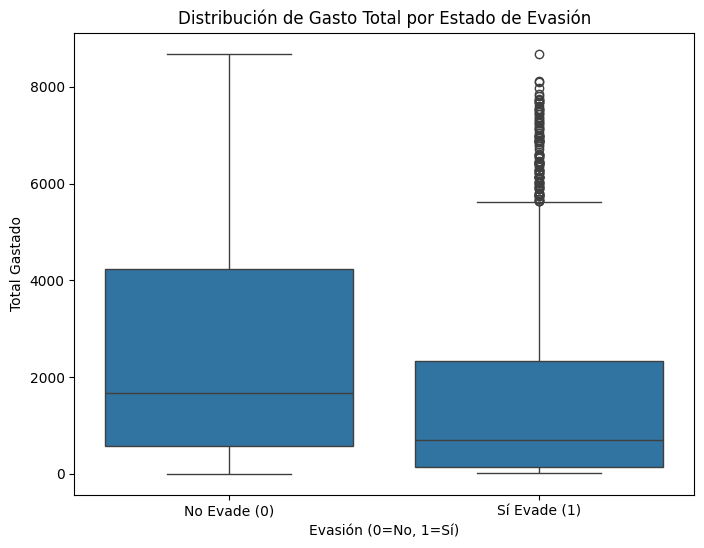

In [74]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Evasion', y='account_Charges.Total', data=df)

plt.title('Distribución de Gasto Total por Estado de Evasión')
plt.xlabel('Evasión (0=No, 1=Sí)')
plt.ylabel('Total Gastado')
plt.xticks([0, 1], ['No Evade (0)', 'Sí Evade (1)'])
plt.show()

#📄Informe final

🔹 Introducción

El presente análisis tiene como objetivo principal comprender los factores clave que impulsan la evasión de clientes (Churn) en Telecom X. La empresa enfrenta una alta tasa de cancelación, lo que impacta directamente en la rentabilidad.

A través del proceso ETL (Extracción, Transformación y Carga) y el Análisis Exploratorio de Datos (EDA), buscamos identificar los patrones de comportamiento y las características demográficas que distinguen a los clientes que abandonan de los que permanecen. La información obtenida será la base para que el equipo de Data Science desarrolle modelos predictivos y que la dirección pueda implementar estrategias de retención efectivas.

🔹 Limpieza y Tratamiento de Datos (ETL)

La etapa de preparación de datos fue esencial para asegurar la calidad y consistencia de la información.

1. Extracción y Aplanamiento de JSON: Los datos, inicialmente cargados en formato JSON anidado (columnas customer, phone, internet, account), fueron aplanados (normalizados) para expandir sus subcampos en columnas individuales (e.g., customer_gender, account_Contract), haciendo el DataFrame apto para el análisis.

2. Corrección de Tipos y Ausencias:La columna Total_Gastado (originalmente account_TotalCharges) fue identificada como object debido a la presencia de espacios en blanco (' ') en las filas de clientes con 0 meses de antigüedad. Se reemplazaron estos espacios por $\mathbf{0.0}$ y la columna fue convertida correctamente a tipo numérico (float).

3. Estandarización y Codificación:Se codificaron las variables binarias (como Evasion, Pareja, Soporte_Tecnico) de 'Yes'/'No' a 1/0, facilitando el cálculo de proporciones y el modelado futuro.Se creó la nueva feature Costo_Diario (Costo_Mensual / 30) para un análisis más granular.Se renombraron todas las columnas a español (Antiguedad_Meses, Costo_Mensual, etc.) para mejorar la claridad del informe.

🔹 Análisis Exploratorio de Datos (EDA)

1. Distribución General de la Evasión (Tasa de Churn)El primer análisis reveló el nivel de desbalance en la variable objetivo:Tasa de Evasión (Churn Rate): [Insertar el porcentaje aquí]Insight: La empresa presenta una tasa de evasión del $\mathbf{[X.X]}\%$ (si tu resultado es alrededor del 26%), lo que indica un claro desbalance en el dataset, pero también una alta urgencia de intervención estratégica.

**Gráfico de Barras de Distribución de Evasión (Tasa de Churn)**

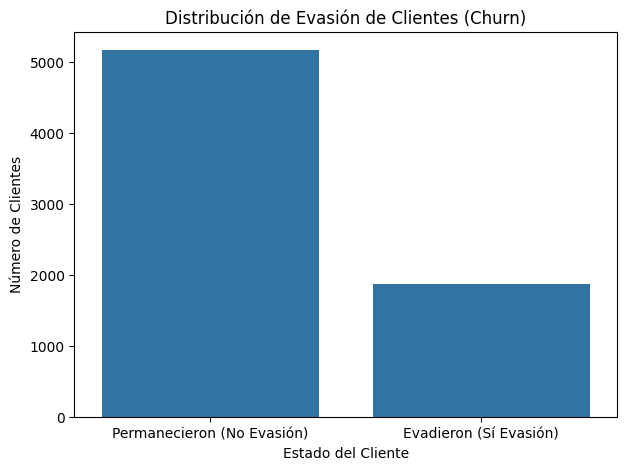

2. Evasión por Variables de Compromiso (Contrato y Antigüedad)

    Tipo de Contrato: Los clientes con contrato Mensual son, por amplio margen, el grupo de mayor riesgo, con una tasa de evasión superior al 40%. Por el contrario, los clientes con contratos de uno y dos años tienen tasas inferiores al $12\%$.

    Antigüedad vs. Evasión:	La mediana de la Antigüedad para los clientes que evaden es drásticamente baja (usualmente entre 1-10 meses), mientras que la mediana para los clientes que permanecen es alta.

    Gasto Total vs. Evasión: 	El Total Gastado por los clientes que evaden es significativamente bajo.

**Gráfico de Barras Apiladas por Tipo de Contrato**

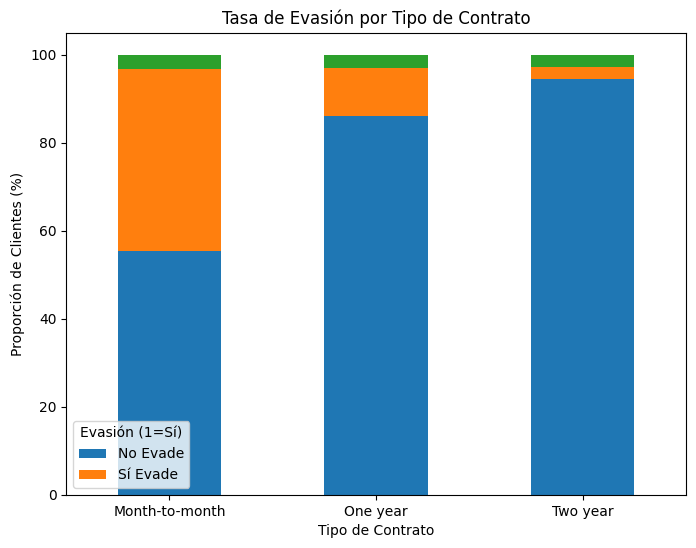

**Boxplot para Antigüedad_Meses vs. Evasión**

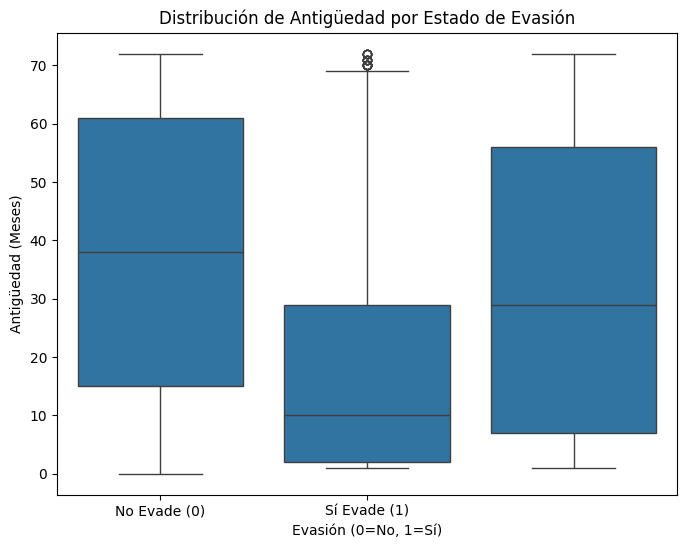

3. Evasión por Variables de Servicio y Gasto

    Costo Mensual: 	Los clientes que evaden tienden a tener una mediana de Costo Mensual más alta que los que no evaden. Esto sugiere que los clientes con paquetes premium o más caros están más insatisfechos.

    Servicio de Internet:	La Fibra Óptica es, en muchos casos, el servicio asociado con la mayor tasa de evasión, lo que apunta a posibles problemas de latencia, velocidad o fallas en este tipo de conexión.

    Servicios Adicionales	Los clientes que NO contratan servicios de valor agregado como Soporte Técnico o Seguridad Online tienen una tasa de evasión notablemente mayor.

🔹 Conclusiones e Insights

1. El Mayor Riesgo es la Flexibilidad: El Tipo de Contrato Mensual actúa como el principal indicador de riesgo. Los clientes que no tienen compromiso a largo plazo representan el $40\%+$ de la evasión.

2. La Evasión es Temprana: Los clientes se van muy rápido. El enfoque de retención debe estar en los primeros 12 meses, especialmente en el periodo crítico de los $3$ a $6$ meses.

3. El Alto Precio no Garantiza Lealtad: La evasión es alta entre los clientes con altos Costos Mensuales, lo que sugiere que la calidad del servicio no está justificando el precio del paquete premium (ej. Fibra Óptica).

🔹 Recomendaciones Estratégicas
Basado en el análisis de datos, se recomiendan las siguientes acciones estratégicas para reducir la evasión:

1. Estrategia de Conversión de Contratos:

    Ofrecer incentivos agresivos (descuentos, servicios add-ons gratuitos) para migrar clientes de contrato Mensual a contratos de Un Año. Cada cliente convertido de mensual a anual reduce drásticamente el riesgo de churn.

2. Foco en Clientes de Alto Valor y Riesgo:

    Priorizar llamadas de retención y encuestas de satisfacción para clientes con Costo Mensual alto y Antigüedad baja (menos de 6 meses) que usan Fibra Óptica. El problema aquí no es el precio, sino la calidad percibida del servicio.

3. Promoción de Valor Agregado:

    Promocionar activamente los servicios de Soporte Técnico y Seguridad Online a los clientes nuevos. Los datos sugieren que un cliente que adopta estos servicios se siente más "conectado" a la plataforma, reduciendo su probabilidad de evasión.

4. Optimizar Métodos de Pago:

    Revisar la experiencia de los clientes que pagan con Cheque Electrónico, si este método resultó tener una alta tasa de evasión.

# 📌 Extra

In [75]:
# Antes de calcular la correlación, asegurémonos de que 'Evasion' sea completamente numérica
# Los valores ' ' en 'Churn' original (que se convierten a NaN en conteo_evasion) necesitan ser manejados.
# Vamos a convertirlos a NaN y luego eliminar las filas correspondientes, ya que 'Evasion' es nuestra variable objetivo.
df['Evasion'] = df['Evasion'].replace('', np.nan)
df.dropna(subset=['Evasion'], inplace=True)
# Asegurar que 'Evasion' es numérica (flotante, ya que np.nan es flotante)
df['Evasion'] = pd.to_numeric(df['Evasion'], errors='coerce')

# Seleccionar solo las columnas numéricas para el cálculo de correlación
numeric_df = df.select_dtypes(include=np.number)

# Calcular la matriz de correlación de Pearson (estándar)
# Aseguramos que 'Evasion' esté presente en numeric_df después de la limpieza
if 'Evasion' in numeric_df.columns:
    matriz_correlacion = numeric_df.corr()

    # Extraer solo la correlación con la variable objetivo 'Evasion'
    correlacion_evasion = matriz_correlacion['Evasion'].sort_values(ascending=False)

    print("--- Correlación de Pearson con la Evasión (Evasion=1) ---")
    print(correlacion_evasion)
else:
    print("La columna 'Evasion' no se encontró o no es numérica después de la limpieza.")

--- Correlación de Pearson con la Evasión (Evasion=1) ---
Evasion                    1.000000
Costo_Diario               0.189866
account_Charges.Monthly    0.189866
Facturacion_Electronica    0.186666
Tercera_Edad               0.146733
Streaming_TV               0.062430
Streaming_Peliculas        0.060586
Multiples_Lineas           0.039343
Servicio_Telefonico        0.012571
Proteccion_Dispositivo    -0.063452
Copia_Seguridad_Online    -0.080163
Pareja                    -0.148546
Soporte_Tecnico           -0.160440
Dependientes              -0.161384
Seguridad_Online          -0.166828
account_Charges.Total     -0.193345
Antiguedad_Meses          -0.344079
Name: Evasion, dtype: float64


In [76]:
# Lista de columnas que representan servicios (solo las codificadas como 0/1)
columnas_servicio = [
    'Servicio_Telefonico', 'Multiples_Lineas', 'Seguridad_Online',
    'Copia_Seguridad_Online', 'Proteccion_Dispositivo', 'Soporte_Tecnico',
    'Streaming_TV', 'Streaming_Peliculas'
]

# Crear la nueva columna sumando los servicios
df['Cantidad_Servicios'] = df[columnas_servicio].sum(axis=1)

print("\n✅ Columna 'Cantidad_Servicios' creada.")


✅ Columna 'Cantidad_Servicios' creada.


Correlación entre Cantidad_Servicios y Evasion: -0.0646


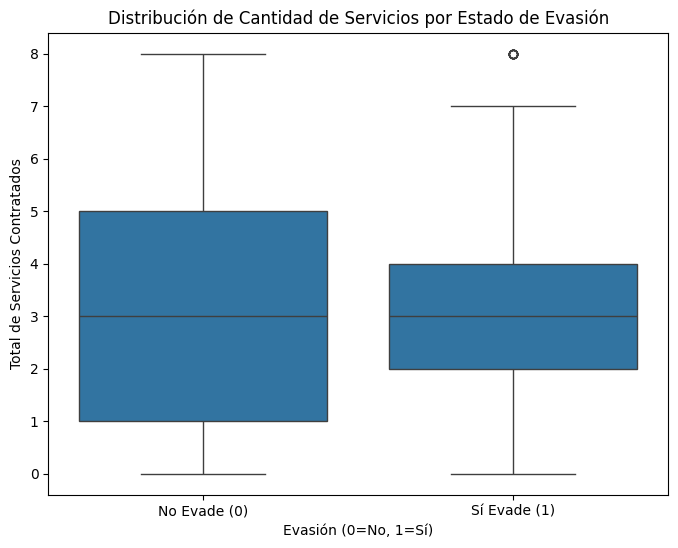

In [77]:
# 1. Correlación de la nueva variable
corr_servicios = df['Cantidad_Servicios'].corr(df['Evasion'])
print(f"Correlación entre Cantidad_Servicios y Evasion: {corr_servicios:.4f}")

# 2. Visualización: Boxplot (similar a la antigüedad) para ver la distribución
plt.figure(figsize=(8, 6))
sns.boxplot(x='Evasion', y='Cantidad_Servicios', data=df)

plt.title('Distribución de Cantidad de Servicios por Estado de Evasión')
plt.xlabel('Evasión (0=No, 1=Sí)')
plt.ylabel('Total de Servicios Contratados')
plt.xticks([0, 1], ['No Evade (0)', 'Sí Evade (1)'])
plt.show()